# Library and Data Imports and Standardization

In [1]:
# Make the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Import ordinal encoder
from sklearn.preprocessing import OrdinalEncoder

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import the datasets

In [2]:
# Import the datasets
convabuse = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv')
dynamically_generated_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv')
online_abusive_attacks = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/online_abusive_attacks_final.csv')
us_elections_2020_hate_speech = pd.read_csv('/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/us_elections_2020_hate_speech_final.csv')

## Split the datasets

In [3]:
# Drop the "Unnamed: 0" column
# convabuse = convabuse.drop(columns=["Unnamed: 0", "example_no"])

In [4]:
# Output the data without the index
convabuse.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/convabuse_final.csv", index=False)

In [5]:
convabuse.head()

,example_no,annotator_id,bot,ableism,homophobic,intellectual,racist,sexist,sex_harassment,transphobic,generalised,individual,system,explicit,implicit,abuse_level
0,0,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,7,CarbonBot,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,7,E.L.I.Z.A.,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
convabuse_X = convabuse.drop("abuse_level", axis=1)
convabuse_y = convabuse["abuse_level"]

Drop the "Unnamed: 0" column from this and future modeling iterations.

In [7]:
# Drop the "Unnamed: 0" column
# dynamically_generated_hate_speech = dynamically_generated_hate_speech.drop("Unnamed: 0", axis=1)

In [8]:
# Output the data without the index
# dynamically_generated_hate_speech.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/data/dynamically_generated_hate_speech_dataset_final.csv", index=False)

In [9]:
dynamically_generated_hate_speech.head()

,label,type,annotator,race_or_ethnicity,gender,religion,lgbtq,nationality,age,disability,class,none,original
0,1.0,0,16,0,0,0,0,0,0,0,0,1,1
1,1.0,-1,9,0,0,0,0,0,0,1,0,0,1
2,1.0,-1,16,1,0,0,0,0,0,0,0,0,1
3,1.0,0,2,0,0,0,0,0,0,0,0,1,1
4,1.0,-1,17,1,0,0,0,0,0,0,0,0,1


In [10]:
dynamically_generated_hate_speech_X = dynamically_generated_hate_speech.drop("label", axis=1)
dynamically_generated_hate_speech_y = dynamically_generated_hate_speech["label"]

In [11]:
online_abusive_attacks.head()

,verified,high Identity_Attack,high Insult,high Profanity,high Threat,high other attr,Toxicity
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,2.0,0.0,10.0,0.0,0.0,1.0
2,0,17.0,1.0,25.0,1.0,0.0,1.0
3,0,9.0,2.0,33.0,2.0,0.0,3.0
4,0,0.0,0.0,7.0,0.0,0.0,0.0


In [12]:
online_abusive_attacks_X = online_abusive_attacks.drop("Toxicity", axis=1)
online_abusive_attacks_y = online_abusive_attacks["Toxicity"]

In [13]:
# Drop the "Unnamed: 0" column
# us_elections_2020_hate_speech = us_elections_2020_hate_speech.drop(columns=["Unnamed: 0", "index"])

In [14]:
us_elections_2020_hate_speech.head()

,index,Trump,Biden,HOF
0,873,1.0,4.0,1
1,2947,0.0,3.0,1
2,2274,0.0,4.0,1
3,902,1.0,4.0,1
4,554,4.0,1.0,1


In [15]:
us_elections_2020_hate_speech_X = us_elections_2020_hate_speech.drop("HOF", axis=1)
us_elections_2020_hate_speech_y = us_elections_2020_hate_speech["HOF"]

# Linear Modeling

In [16]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [17]:
# Get only the numeric features for each dataset
convabuse_X_numeric = convabuse_X.select_dtypes(include=np.number)
dynamically_generated_hate_speech_X_numeric = dynamically_generated_hate_speech_X.select_dtypes(include=np.number)
online_abusive_attacks_X_numeric = online_abusive_attacks_X.select_dtypes(include=np.number)
us_elections_2020_hate_speech_X_numeric = us_elections_2020_hate_speech_X.select_dtypes(include=np.number)

In [18]:
# Use standard scaler on the Convabuse X data
convabuse_scaler = StandardScaler()
convabuse_X_scaled = convabuse_scaler.fit_transform(convabuse_X_numeric)
convabuse_X_scaled = pd.DataFrame(convabuse_X_scaled, columns=convabuse_X_numeric.columns)

In [19]:
# Use standard scaler on the Dynamically Generated Hate Speech X data
dghs_scaler = StandardScaler()
dynamically_generated_hate_speech_X_scaled = dghs_scaler.fit_transform(dynamically_generated_hate_speech_X_numeric)
dynamically_generated_hate_speech_X_scaled = pd.DataFrame(dynamically_generated_hate_speech_X_scaled, columns=dynamically_generated_hate_speech_X_numeric.columns)

In [20]:
# Use standard scaler on the online abusive attacks X data
oaa_scaler = StandardScaler()
online_abusive_attacks_X_scaled = oaa_scaler.fit_transform(online_abusive_attacks_X_numeric)
online_abusive_attacks_X_scaled = pd.DataFrame(online_abusive_attacks_X_scaled, columns=online_abusive_attacks_X_numeric.columns)

In [21]:
# Use standard scaler on the US elections 2020 hate speech X data
us2020hs_scaler = StandardScaler()
us_elections_2020_hate_speech_X_scaled = us2020hs_scaler.fit_transform(us_elections_2020_hate_speech_X_numeric)
us_elections_2020_hate_speech_X_scaled = pd.DataFrame(us_elections_2020_hate_speech_X_scaled, columns=us_elections_2020_hate_speech_X_numeric.columns)

In [22]:
for columns in [convabuse_X_numeric.columns, dynamically_generated_hate_speech_X_numeric.columns, online_abusive_attacks_X_numeric.columns, us_elections_2020_hate_speech_X_numeric.columns]:
  print(columns)

Index(['example_no', 'annotator_id', 'ableism', 'homophobic', 'intellectual',
       'racist', 'sexist', 'sex_harassment', 'transphobic', 'generalised',
       'individual', 'system', 'explicit', 'implicit'],
      dtype='object')
Index(['type', 'annotator', 'race_or_ethnicity', 'gender', 'religion', 'lgbtq',
       'nationality', 'age', 'disability', 'class', 'none', 'original'],
      dtype='object')
Index(['verified', 'high Identity_Attack', 'high Insult', 'high Profanity',
       'high Threat', 'high other attr'],
      dtype='object')
Index(['index', 'Trump', 'Biden'], dtype='object')


In [23]:
# Train test split for each dataset
convabuse_X_train, convabuse_X_test, convabuse_y_train, convabuse_y_test = train_test_split(convabuse_X_scaled, convabuse_y, test_size=0.2, random_state=42)
dynamically_generated_hate_speech_X_train, dynamically_generated_hate_speech_X_test, dynamically_generated_hate_speech_y_train, dynamically_generated_hate_speech_y_test = train_test_split(dynamically_generated_hate_speech_X_scaled, dynamically_generated_hate_speech_y, test_size=0.2, random_state=42)
online_abusive_attacks_X_train, online_abusive_attacks_X_test, online_abusive_attacks_y_train, online_abusive_attacks_y_test = train_test_split(online_abusive_attacks_X_scaled, online_abusive_attacks_y, test_size=0.2, random_state=42)
us_elections_2020_hate_speech_X_train, us_elections_2020_hate_speech_X_test, us_elections_2020_hate_speech_y_train, us_elections_2020_hate_speech_y_test = train_test_split(us_elections_2020_hate_speech_X_scaled, us_elections_2020_hate_speech_y, test_size=0.2, random_state=42)

In [24]:
# Perform linear regression on the convabuse dataset
convabuse_linear_model = LinearRegression()
convabuse_linear_model = convabuse_linear_model.fit(convabuse_X_train, convabuse_y_train)
convabuse_linear_y_pred = convabuse_linear_model.predict(convabuse_X_test)
convabuse_linear_rmse = root_mean_squared_error(convabuse_y_test, convabuse_linear_y_pred)
convabuse_linear_r2 = r2_score(convabuse_y_test, convabuse_linear_y_pred)
print(f"RMSE: {convabuse_linear_rmse}")
print(f"R2: {convabuse_linear_r2}")

RMSE: 0.6363372138448666
R2: 0.7973898499148554


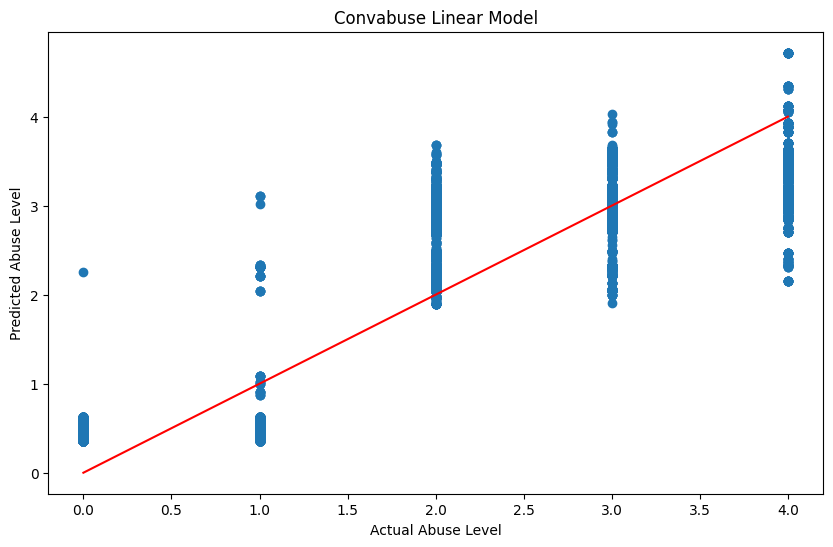

In [25]:
# Plot the linear model for the convabuse dataset
plt.figure(figsize=(10, 6))
plt.scatter(convabuse_y_test, convabuse_linear_y_pred)
plt.plot([min(convabuse_y_test), max(convabuse_y_test)], [min(convabuse_y_test), max(convabuse_y_test)], color='red')
plt.xlabel("Actual Abuse Level")
plt.ylabel("Predicted Abuse Level")
plt.title("Convabuse Linear Model")
plt.show()

In [26]:
# Perform linear regression on the convabuse dataset
dynamically_generated_hate_speech_linear_model = LinearRegression()
dynamically_generated_hate_speech_linear_model = dynamically_generated_hate_speech_linear_model.fit(dynamically_generated_hate_speech_X_train, dynamically_generated_hate_speech_y_train)
dynamically_generated_hate_speech_linear_y_pred = dynamically_generated_hate_speech_linear_model.predict(dynamically_generated_hate_speech_X_test)
dynamically_generated_hate_speech_linear_rmse = root_mean_squared_error(dynamically_generated_hate_speech_y_test, dynamically_generated_hate_speech_linear_y_pred)
dynamically_generated_hate_speech_linear_r2 = r2_score(dynamically_generated_hate_speech_y_test, dynamically_generated_hate_speech_linear_y_pred)
print(f"RMSE: {dynamically_generated_hate_speech_linear_rmse}")
print(f"R2: {dynamically_generated_hate_speech_linear_r2}")

RMSE: 0.3361294727036687
R2: 0.548066780050041


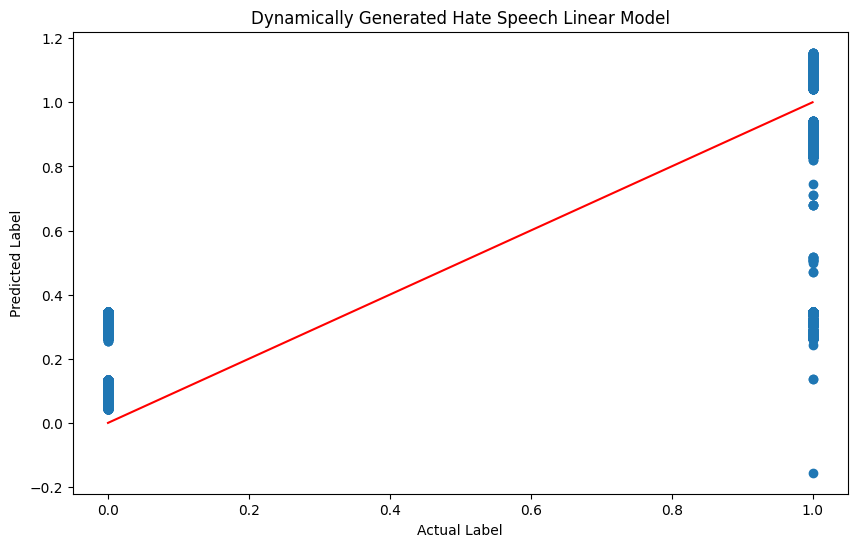

In [27]:
# Plot the linear model for the dynamically generated hate speech dataset
plt.figure(figsize=(10, 6))
plt.scatter(dynamically_generated_hate_speech_y_test, dynamically_generated_hate_speech_linear_y_pred)
plt.plot([min(dynamically_generated_hate_speech_y_test), max(dynamically_generated_hate_speech_y_test)], [min(dynamically_generated_hate_speech_y_test), max(dynamically_generated_hate_speech_y_test)], color='red')
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")
plt.title("Dynamically Generated Hate Speech Linear Model")
plt.show()

In [28]:
# Perform linear regression on the convabuse dataset
online_abusive_attacks_linear_model = LinearRegression()
online_abusive_attacks_linear_model = online_abusive_attacks_linear_model.fit(online_abusive_attacks_X_train, online_abusive_attacks_y_train)
online_abusive_attacks_linear_y_pred = online_abusive_attacks_linear_model.predict(online_abusive_attacks_X_test)
online_abusive_attacks_linear_rmse = root_mean_squared_error(online_abusive_attacks_y_test, online_abusive_attacks_linear_y_pred)
online_abusive_attacks_linear_r2 = r2_score(online_abusive_attacks_y_test, online_abusive_attacks_linear_y_pred)
print(f"RMSE: {online_abusive_attacks_linear_rmse}")
print(f"R2: {online_abusive_attacks_linear_r2}")

RMSE: 4.1294794096422365
R2: 0.9283058632248125


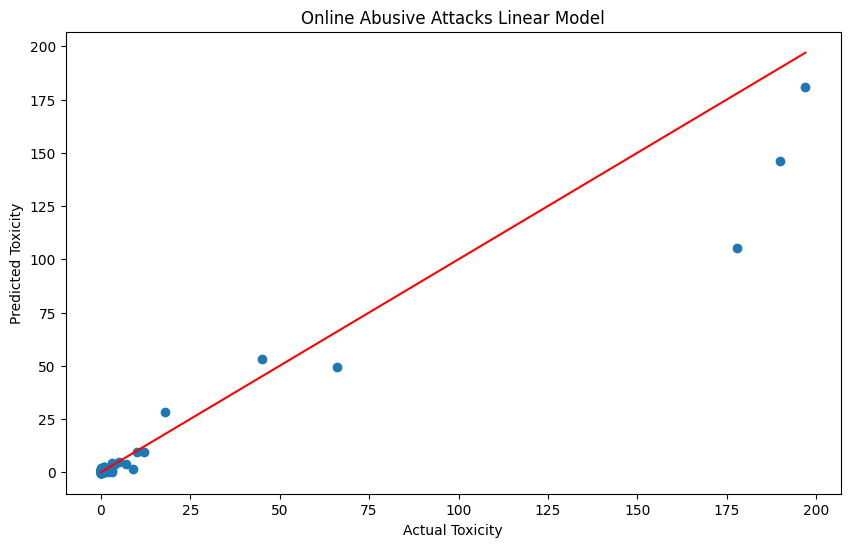

In [29]:
# Plot the linear model for the online abusive attacks dataset
plt.figure(figsize=(10, 6))
plt.scatter(online_abusive_attacks_y_test, online_abusive_attacks_linear_y_pred)
plt.plot([min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], [min(online_abusive_attacks_y_test), max(online_abusive_attacks_y_test)], color='red')
plt.xlabel("Actual Toxicity")
plt.ylabel("Predicted Toxicity")
plt.title("Online Abusive Attacks Linear Model")
plt.show()

In [30]:
# Perform linear regression on the convabuse dataset
us_elections_2020_hate_speech_linear_model = LinearRegression()
us_elections_2020_hate_speech_linear_model = us_elections_2020_hate_speech_linear_model.fit(us_elections_2020_hate_speech_X_train, us_elections_2020_hate_speech_y_train)
us_elections_2020_hate_speech_linear_y_pred = us_elections_2020_hate_speech_linear_model.predict(us_elections_2020_hate_speech_X_test)
us_elections_2020_hate_speech_linear_rmse = root_mean_squared_error(us_elections_2020_hate_speech_y_test, us_elections_2020_hate_speech_linear_y_pred)
us_elections_2020_hate_speech_linear_r2 = r2_score(us_elections_2020_hate_speech_y_test, us_elections_2020_hate_speech_linear_y_pred)
print(f"RMSE: {us_elections_2020_hate_speech_linear_rmse}")
print(f"R2: {us_elections_2020_hate_speech_linear_r2}")

RMSE: 0.49997316045995027
R2: -0.0006941975672847267


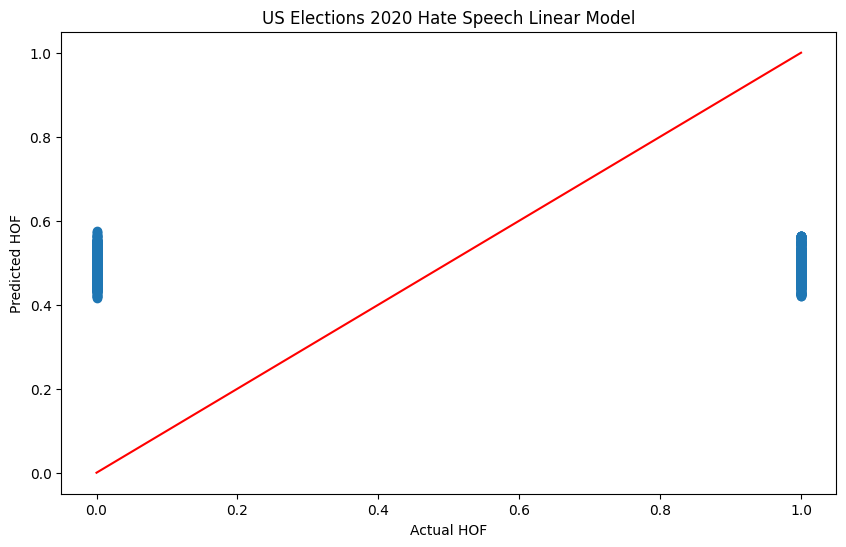

In [31]:
# Plot the linear model for the US elections 2020 hate speech dataset
plt.figure(figsize=(10, 6))
plt.scatter(us_elections_2020_hate_speech_y_test, us_elections_2020_hate_speech_linear_y_pred)
plt.plot([min(us_elections_2020_hate_speech_y_test), max(us_elections_2020_hate_speech_y_test)], [min(us_elections_2020_hate_speech_y_test), max(us_elections_2020_hate_speech_y_test)], color='red')
plt.xlabel("Actual HOF")
plt.ylabel("Predicted HOF")
plt.title("US Elections 2020 Hate Speech Linear Model")
plt.show()

In [32]:
# Create a dictionary where each dataset maps to its RMSE and R2
linear_model_summary_data = [
    {
        "Model": "Linear Regression",
        "Dataset": "Convabuse",
        "RMSE": convabuse_linear_rmse,
        "R2": convabuse_linear_r2
    },
    {
        "Model": "Linear Regression",
        "Dataset": "Dynamically Generated Hate Speech",
        "RMSE": dynamically_generated_hate_speech_linear_rmse,
        "R2": dynamically_generated_hate_speech_linear_r2
    },
    {
        "Model": "Linear Regression",
        "Dataset": "Online Abusive Attacks",
        "RMSE": online_abusive_attacks_linear_rmse,
        "R2": online_abusive_attacks_linear_r2
    },
    {
        "Model": "Linear Regression",
        "Dataset": "US Elections 2020 Hate Speech",
        "RMSE": us_elections_2020_hate_speech_linear_rmse,
        "R2": us_elections_2020_hate_speech_linear_r2
    }
]

# Convert to DataFrame (datasets become rows, metrics are columns)
linear_model_summary = pd.DataFrame(linear_model_summary_data)
linear_model_summary

,Model,Dataset,RMSE,R2
0,Linear Regression,Convabuse,0.636337,0.797390
1,Linear Regression,Dynamically Generated Hate Speech,0.336129,0.548067
2,Linear Regression,Online Abusive Attacks,4.129479,0.928306
3,Linear Regression,US Elections 2020 Hate Speech,0.499973,-0.000694


In [33]:
linear_model_summary.to_csv("/content/drive/My Drive/Online MSDS/MOD C2/Political Polarization/results/model1_linear-model-summary.csv", index=False)